In [1]:
import gwpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gwpy.frequencyseries import FrequencySeries

In [3]:
data = np.genfromtxt('injection_L1.dat')

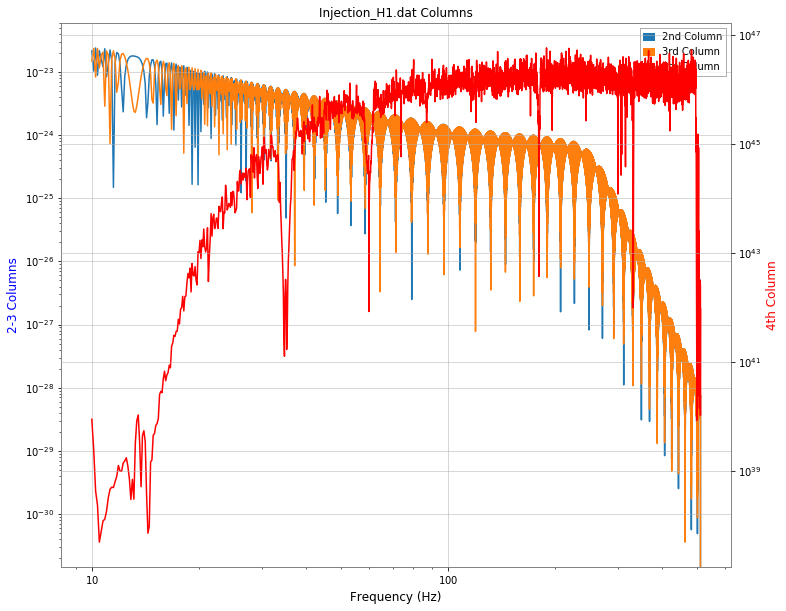

In [4]:
plt.figure(figsize=(12, 10))
ax = plt.gca()
line1 = ax.loglog(data[:,0], np.abs(data[:,1]), label='2nd Column')
line2 = ax.loglog(data[:,0], np.abs(data[:,2]), label='3rd Column')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('2-3 Columns', color='b')
ax2 = ax.twinx()
line3 = ax2.loglog(data[:,0], np.abs(data[:,3]), label='4th Column', color='r')
ax2.set_ylabel('4th Column', color='r')
lns = line1+line2+line3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
plt.title('Injection_H1.dat Columns')
plt.show()

In [20]:
seglen = 8.
srate = 1024.
trigtime = 1126103127.521729
fs = data[:,1]+1j*data[:,2]
freq = data[:,0]

f2 = np.arange(4097)/seglen
fs2 = np.pad(fs, (f2.shape[0]-fs.shape[0]-1, 1), 'constant', constant_values=(0,0))

In [21]:
inj = FrequencySeries(fs2, frequencies=f2, epoch=trigtime)

In [22]:
from scipy.signal import tukey
def tukey_window(ts, seglen, a=0.4):
    window = tukey(len(ts), alpha=a/seglen)
    return ts*window


In [23]:
from gwpy.timeseries import TimeSeries
seglen = 8.
srate = 1024.
trigtime = 1126103127.521729
L1_data_files = ['L-L1_HOFT_C01-112609686-4096.gwf', 'L-L1_HOFT_C01-1126100992-4096.gwf', 'L-L1_HOFT_C01-1126105088-4096.gwf']
L1_channel = 'L1:DCS-CALIB_STRAIN_C01'
L1_psd_file = '1126103127.522_L1-PSD.dat'
start = trigtime-seglen+2
end = trigtime+2
L1_ts = TimeSeries.read(L1_data_files, L1_channel, start=start, end=end)
L1_qtranf = L1_ts.q_transform()
t_max_idx, f_max_idx = np.unravel_index(np.argmax(L1_qtranf), L1_qtranf.shape)
L1_fs = tukey_window(L1_ts.resample(1024.), seglen).fft()

In [24]:
print(inj.frequencies)

[0.00000e+00 1.25000e-01 2.50000e-01 ... 5.11750e+02 5.11875e+02
 5.12000e+02] Hz


In [25]:
print(L1_fs.frequencies)

[0.00000e+00 1.25000e-01 2.50000e-01 ... 5.11750e+02 5.11875e+02
 5.12000e+02] Hz


In [26]:
signal = L1_fs+inj

(1126103126.521729, 1126103128.021729)

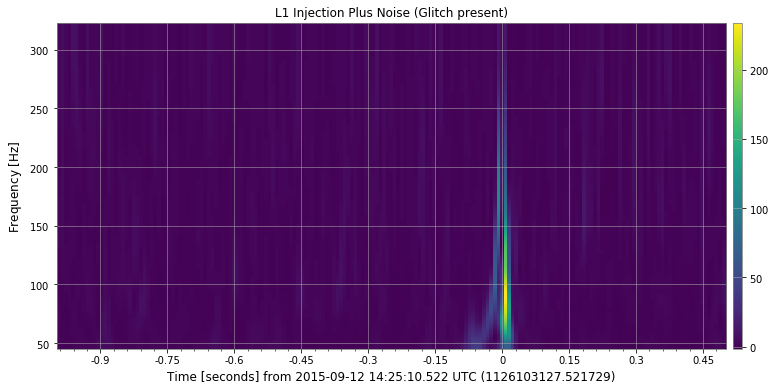

In [29]:
qTr = signal.ifft().q_transform()
pl = qTr.plot()
ax = plt.gca()
ax.set_epoch(trigtime)
ax.colorbar()
ax.set_title('L1 Injection Plus Noise (Glitch present)')
ax.set_xlim(trigtime-1, trigtime+0.5)

(1126103126.521729, 1126103128.021729)

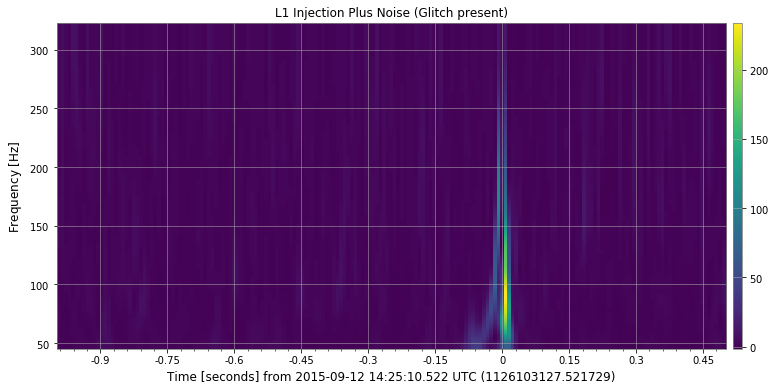

In [30]:
sig_qTr = signal.ifft().q_transform()
sig_pl = qTr.plot()
ax = plt.gca()
ax.set_epoch(trigtime)
ax.colorbar()
ax.set_title('L1 Injection Plus Noise (Glitch present)')
ax.set_xlim(trigtime-1, trigtime+0.5)

(1126103126.521729, 1126103128.021729)

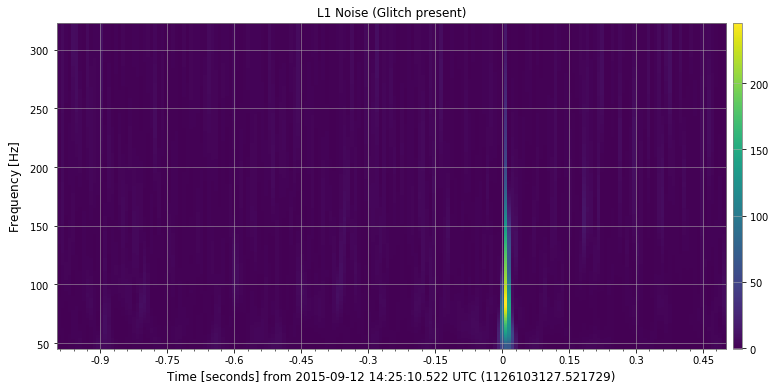

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=1)
qTr = L1_ts.resample(srate).q_transform()
pl = qTr.plot()
ax = plt.gca()
ax.set_epoch(trigtime)
ax.colorbar()
ax.set_title('L1 Noise (Glitch present)')
ax.set_xlim(trigtime-1, trigtime+0.5)


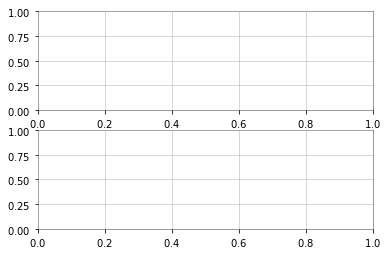

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=1)


In [34]:
pl.add_subplot(2, 1, 2)

/home/bedelman/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]